In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE

/home/bruno/codenation/data-science-1/venv/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set(style='whitegrid', rc={'figure.figsize':(30, 30)})

In [3]:
train = pd.read_csv('data/train.csv', index_col='Unnamed: 0')
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
test = pd.read_csv('data/test.csv')
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [5]:
train = train[list(test.columns) + ['IN_TREINEIRO']]
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,0
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,0
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,0
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,0
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,0


In [6]:
train_infos = pd.DataFrame({'column': train.columns,
                            'dtype': train.dtypes,
                            'n_missing': train.isna().sum(),
                            'n_unique': train.nunique()}).reset_index().drop('index', axis=1)
train_infos.sort_values('n_missing', ascending=False)

,column,dtype,n_missing,n_unique
11,TP_DEPENDENCIA_ADM_ESC,float64,9448,4
10,TP_ENSINO,float64,9448,3
41,Q027,object,7373,13
34,NU_NOTA_REDACAO,float64,3597,53
26,NU_NOTA_LC,float64,3597,2774
28,TP_STATUS_REDACAO,float64,3597,9
29,NU_NOTA_COMP1,float64,3597,15
30,NU_NOTA_COMP2,float64,3597,13
31,NU_NOTA_COMP3,float64,3597,12
32,NU_NOTA_COMP4,float64,3597,14


In [7]:
drop_columns = []
for index, row in train_infos.iterrows():
    if row['n_unique'] == 1:
        drop_columns.append(row['column'])
        
# Drop NU_INSCRICAO as it's just an identification column
drop_columns.append('NU_INSCRICAO')
# Drop Q027, TP_ENSINO and TP_DEPENDENCIA_ADM_ESC as they have more than 50% of values as missing data
drop_columns.append('Q027')
drop_columns.append('TP_ENSINO')
drop_columns.append('TP_DEPENDENCIA_ADM_ESC')
        
train_infos = train_infos[train_infos['n_unique'] != 1]
train_infos = train_infos[train_infos['column'] != 'NU_INSCRICAO']
train_infos = train_infos[train_infos['column'] != 'Q027']
train_infos = train_infos[train_infos['column'] != 'TP_ENSINO']
train_infos = train_infos[train_infos['column'] != 'TP_DEPENDENCIA_ADM_ESC']

train.drop(drop_columns, axis=1, inplace=True)

In [8]:
train_num = train.select_dtypes(include=['int64', 'float64']).copy()
train_cat = train.select_dtypes(include=['object']).copy()
features_all = list(train_num.columns) + list(train_cat.columns)

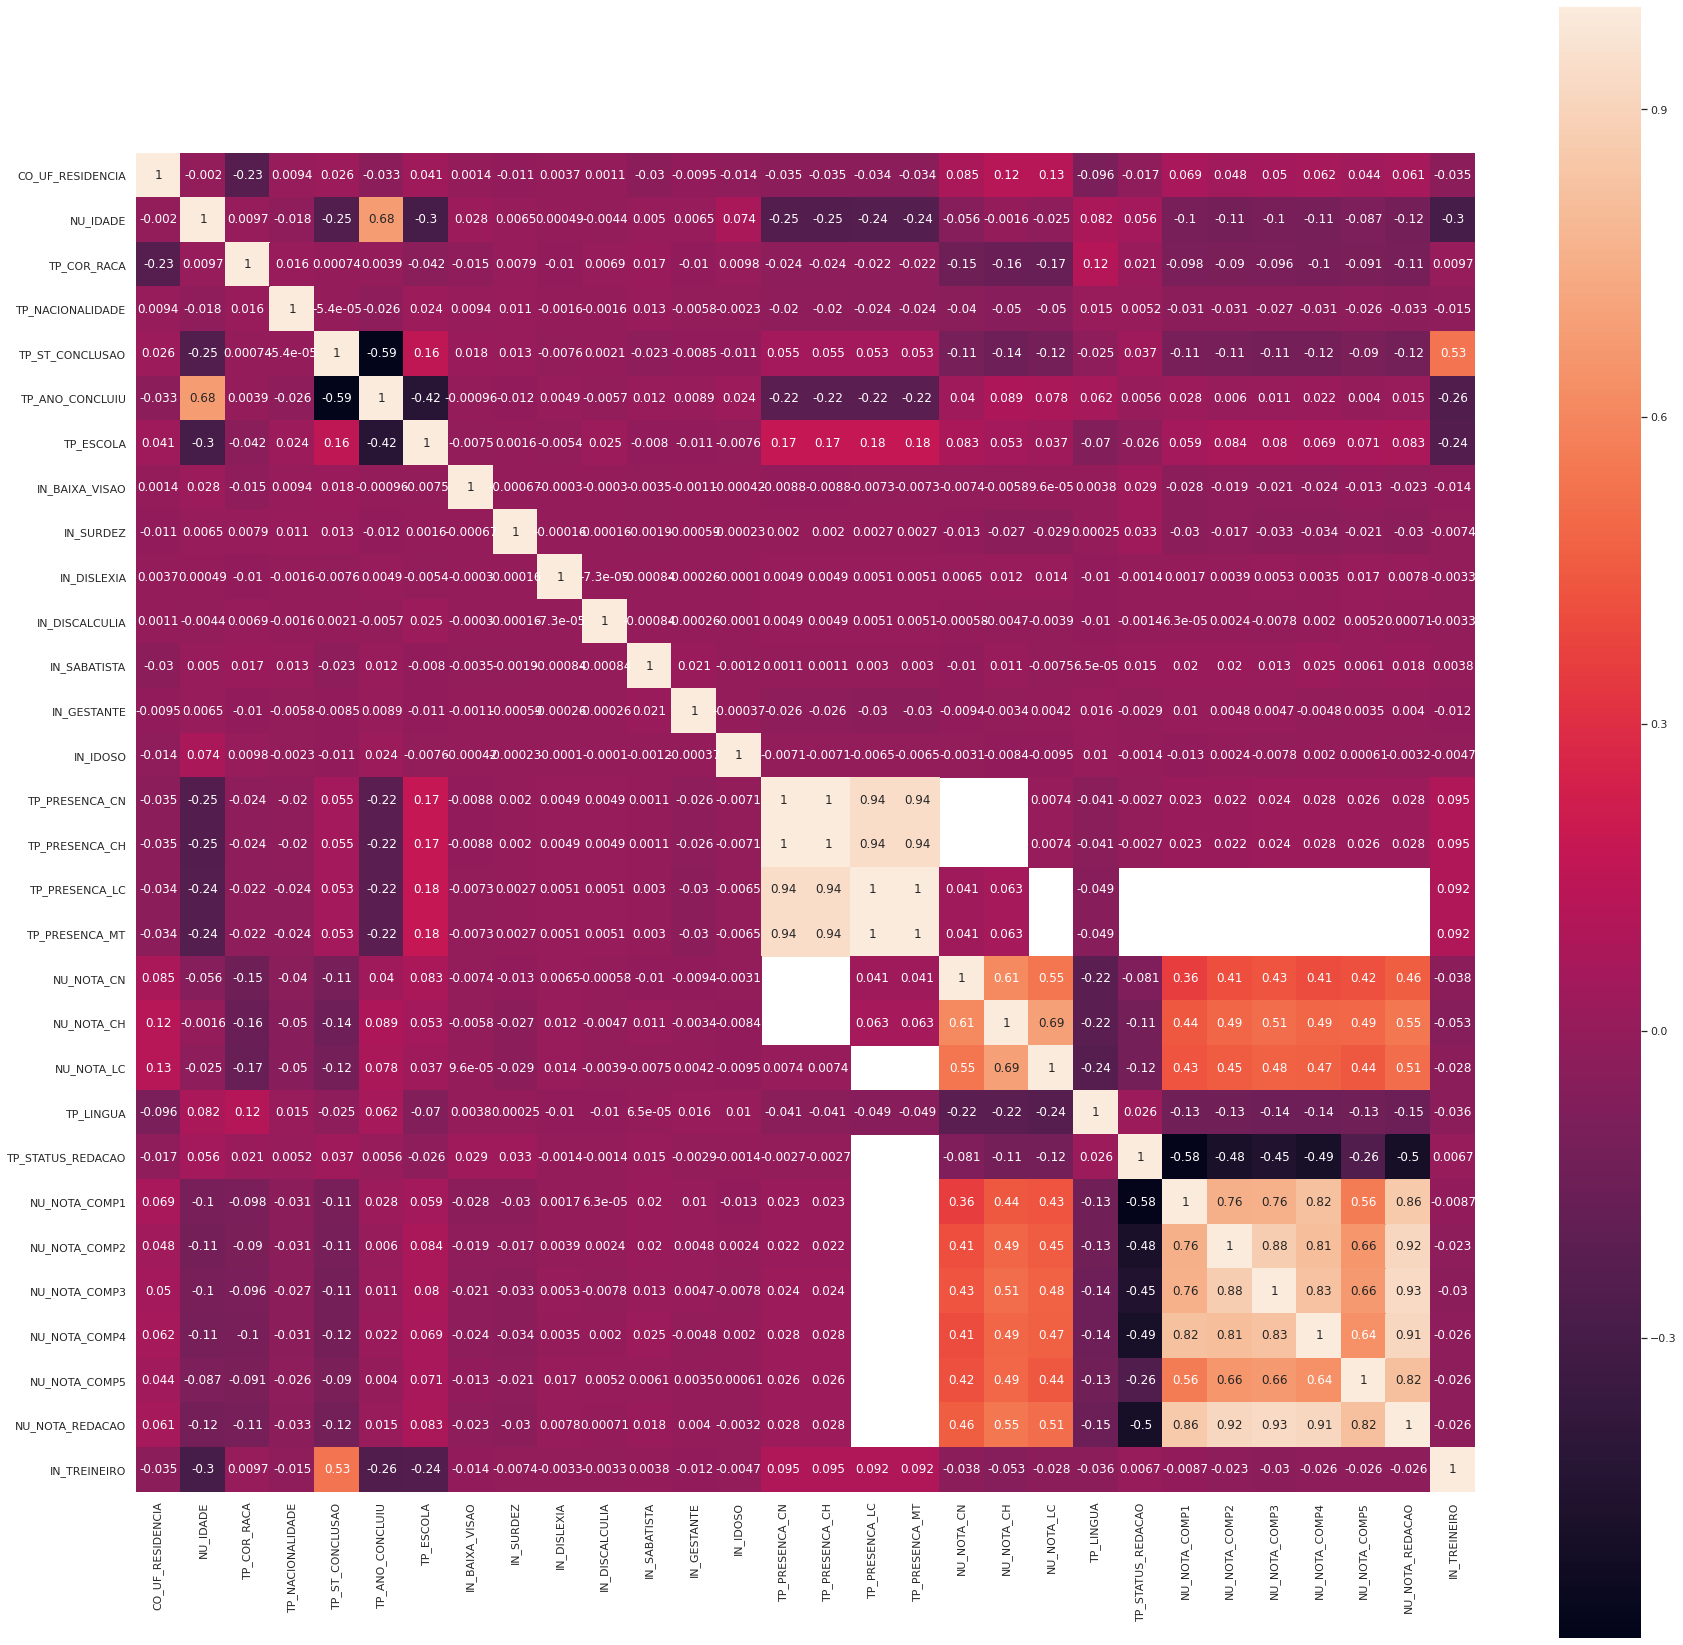

In [9]:
sns.heatmap(train_num.corr(), annot=True, square=True)
plt.show()

In [10]:
train_num.fillna(0, inplace=True)

In [11]:
train_num.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_SURDEZ,IN_DISLEXIA,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_TREINEIRO
1,43,24,1,1,1,4,1,0,0,0,...,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,0
2,23,17,3,1,2,0,2,0,0,0,...,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0
3,23,21,3,1,3,0,1,0,0,0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,33,25,0,1,1,9,1,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,13,28,2,1,1,4,1,0,0,0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Encoding categorical data

In [12]:
train_cat = pd.get_dummies(train_cat)
train_cat.head()

,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [13]:
train_final = pd.concat([train_num, train_cat], axis=1)
train_final.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_SURDEZ,IN_DISLEXIA,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
1,43,24,1,1,1,4,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,23,17,3,1,2,0,2,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,23,21,3,1,3,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,33,25,0,1,1,9,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5,13,28,2,1,1,4,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [14]:
y_data = train_final['IN_TREINEIRO']
X_data = train_final.drop('IN_TREINEIRO', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.2,
                                                    random_state=42, stratify=y_data)

## PCA

In [15]:
pca = PCA(n_components=2)
imb_pca = pca.fit_transform(X_train)

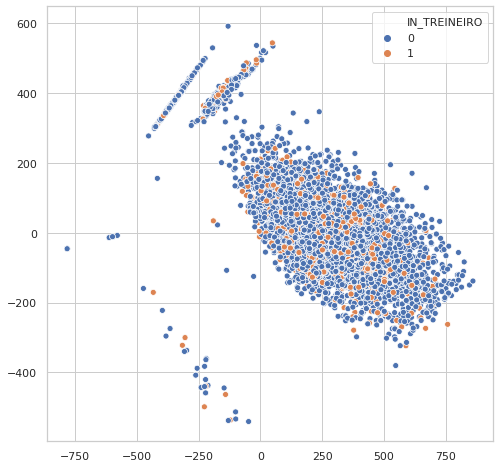

In [16]:
plt.figure(figsize=(8, 8))

sns.scatterplot(x=imb_pca[:, 0], y=imb_pca[:, 1], hue=y_train)
plt.show()

In [17]:
y_train.value_counts()/y_train.shape[0]

0    0.870175
1    0.129825
Name: IN_TREINEIRO, dtype: float64

It's visible that we have an imbalanced target, so let's use SMOTE to apply an oversamplig to the positive target (trainee)

## Handling Imbalanced Data

In [18]:
smote = SMOTE(sampling_strategy='minority', random_state=42)

X_smote, y_smote = smote.fit_resample(X_train, y_train)

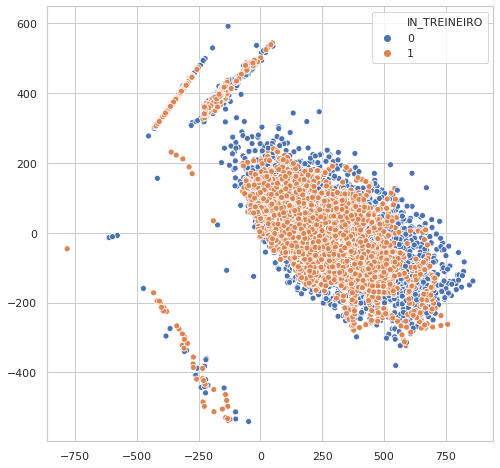

In [19]:
imb_pca_smote = pca.transform(X_smote)

plt.figure(figsize=(8, 8))

sns.scatterplot(x=imb_pca_smote[:, 0], y=imb_pca_smote[:, 1], hue=y_smote)
plt.show()

In [20]:
y_smote.value_counts()

1    9558
0    9558
Name: IN_TREINEIRO, dtype: int64

## Logistic Regression

In [21]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)
logistic.predict(X_test)

/home/bruno/codenation/data-science-1/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 1, 1, 0])

In [22]:
score = logistic.score(X_test, y_test)
print('Accuracy of Logistic Model: {}'.format(score))

Accuracy of Logistic Model: 0.9617625637290604


## KNN

In [23]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
neigh.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
score = neigh.score(X_test, y_test)
print('Accuracy of KNN Model: {}'.format(score))

Accuracy of KNN Model: 0.8703568827385287


## Decision Tree

In [25]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [26]:
score = tree.score(X_test, y_test)
print('Accuracy of Decision Tree Model: {}'.format(score))

Accuracy of Decision Tree Model: 0.9949016751638747


## Random Forest

In [27]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
forest.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [28]:
score = forest.score(X_test, y_test)
print('Accuracy of Random Forest Model: {}'.format(score))

Accuracy of Random Forest Model: 0.9949016751638747


## Applying the best model on test

In [34]:
try:
    features_all.remove('IN_TREINEIRO')
except:
    pass
test_data = test[features_all].copy()
test_num = test_data.select_dtypes(include=['int64', 'float64']).copy()
test_cat = test_data.select_dtypes(include=['object']).copy()

test_num.fillna(0, inplace=True)
print(test_num.shape)
test_cat = pd.get_dummies(test_cat)
print(test_cat.shape)

test_final = pd.concat([test_num, test_cat], axis=1)

test_final.head()

(4570, 29)
(4570, 77)


,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_SURDEZ,IN_DISLEXIA,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,43,19,1,1,1,3,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,15,24,3,2,1,4,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,29,16,2,1,3,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,41,17,1,1,2,0,2,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,53,19,1,1,1,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [35]:
test_predicted = forest.predict(test_final)

In [36]:
ans_data = {'NU_INSCRICAO': test['NU_INSCRICAO'],
            'IN_TREINEIRO': test_predicted}
answer = pd.DataFrame(ans_data)
answer.to_csv('answer.csv', index=False)